In [140]:
from notebook_tools import *
%matplotlib inline

In [126]:
ColleCalc = pd.DataFrame({'A':[4,12 , 27 , 56 , 208],
                        'allpairs':[110,140,144,146,145],
                        'nl00':[110,156,164,172,178]},
                         index = ['$^{4}$He','$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb'])
ColleCalc

,A,allpairs,nl00
$^{4}$He,4,110,110
$^{12}$C,12,140,156
$^{27}$Al,27,144,164
$^{56}$Fe,56,146,172
$^{208}$Pb,208,145,178


In [138]:
CiofiCalc = pd.DataFrame({'A':[3 , 4 , 16 , 40 , 56 , 208],
                        's_t':[72.4 , 89.9 , 127.2 , 140.7 , 132.8 , 151.1]},
                         index = ['$^{3}$He','$^{4}$He','$^{12}$C','$^{40}$Ca','$^{56}$Fe','$^{208}$Pb'])
CiofiCalc

,A,s_t
$^{3}$He,3,72.4
$^{4}$He,4,89.9
$^{12}$C,16,127.2
$^{40}$Ca,40,140.7
$^{56}$Fe,56,132.8
$^{208}$Pb,208,151.1


In [139]:
MonizCalc = pd.DataFrame({'A':[12 , 40 , 208],
                        '3kF/4':[165.8 , 188.3 , 198.8]},
                         index = ['$^{12}$C','$^{40}$Ca','$^{208}$Pb'])
MonizCalc

,3kF/4,A
$^{12}$C,165.8,12
$^{40}$Ca,188.3,40
$^{208}$Pb,198.8,208


In [62]:
NoAccCorr = pd.DataFrame({'A':[12 , 27 , 56 , 208],
                        's_x':[165,155,176,202],
                        's_x_Err':[7,21,10,11],
                        's_y':[179,179,197,177],
                        's_y_Err':[12,20,15,15]},
                         index = ['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb'])

NoAccCorr['s_t'] = 0.5*( NoAccCorr['s_x'] + NoAccCorr['s_y'] ) 
NoAccCorr['s_t_Err'] = 1./np.sqrt( 1./np.square(NoAccCorr['s_x_Err']) + 1./np.square(NoAccCorr['s_y_Err']) )

# c.m. resolution correction
NoAccCorr['s_t_final'] = np.sqrt( np.square(NoAccCorr['s_t']) - np.square(20))
NoAccCorr['s_t_final_Err'] = np.sqrt( np.square(NoAccCorr['s_t_Err']) + np.square(5))

NoAccCorr

,A,s_x,s_x_Err,s_y,s_y_Err,s_t,s_t_Err,s_t_final,s_t_final_Err
$^{12}$C,12,165,7,179,12,172.0,6.046452,170.833252,7.845992
$^{27}$Al,27,155,21,179,20,167.0,14.482759,165.798070,15.321563
$^{56}$Fe,56,176,10,197,15,186.5,8.320503,185.424513,9.707253
$^{208}$Pb,208,202,11,177,15,189.5,8.870455,188.441636,10.182582


In [144]:
# runs 10,000 - 72,500
ThisWork = pd.DataFrame({'A':[12 , 27 , 56 , 208],
                        's_t_AccCorr':[160,157,182,175],
                        's_t_AccCorrErr':[9,18,9,15]},index = ['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb'])
# c.m. resolution correction
ThisWork['s_t_final'] = np.sqrt( np.square(ThisWork['s_t_AccCorr']) - np.square(20))
ThisWork['s_t_final_Err'] = np.sqrt( np.square(ThisWork['s_t_AccCorrErr']) + np.square(5))

ThisWork

,A,s_t_AccCorr,s_t_AccCorrErr,s_t_final,s_t_final_Err
$^{12}$C,12,160,9,158.745079,10.295630
$^{27}$Al,27,157,18,155.720904,18.681542
$^{56}$Fe,56,182,9,180.897761,10.295630
$^{208}$Pb,208,175,15,173.853387,15.811388


In [58]:
BNL_Data = pd.DataFrame({'A':[12],'s_t_final':[143],'s_t_final_Err':[17]},index = ['$^{12}$C'])
HallA_Data = pd.DataFrame({'A':[12],'s_t_final':[136],'s_t_final_Err':[20]},index = ['$^{12}$C'])
Korover_Data = pd.DataFrame({'A':[4],'s_t_final':[100],'s_t_final_Err':[20]},index = ['$^{4}$He'])

In [141]:

def plot_data(data , Ashift=0, fmt='o', marker='^',color='red',
                       markersize=20, linewidth=4, 
                       vary=None , varyerr=None , label=None ):
    ax.errorbar((data['A']+Ashift), data['s_t_final'], yerr=data['s_t_final_Err'],                
                color=color, marker=marker,markersize=markersize,linewidth=linewidth, fmt=fmt,label=label)
    
def plot_calculation_line( data , varx='A',kind='nearest' , vary=None , color='blue' , label=None, linewidth=4):
    x = data[varx]
    y = data[vary]
    itp = interp1d(x,y, kind='linear')

    if kind is None:
        f = interp1d( x , y )
    else:
        f = interp1d( x , y ,kind=kind)

    window_size, poly_order = 101, 4
    xnew = np.linspace(x.min(),x.max(), num=500, endpoint=True)
    yy_sg = savgol_filter(itp(xnew), window_size, poly_order)
    plt.plot( xnew, yy_sg, '--', color=color , label=label, linewidth=linewidth )


In [154]:
def do_line_check(A=12):
    _min_ = float(ThisWork[ThisWork.A==A]['s_t_final']-ThisWork[ThisWork.A==A]['s_t_final_Err'])
    _max_ = float(ThisWork[ThisWork.A==A]['s_t_final']+ThisWork[ThisWork.A==A]['s_t_final_Err'])

    plt.plot(np.linspace(0,210,100) , np.ones(100)*_min_)
    plt.plot(np.linspace(0,210,100) , np.ones(100)*_max_)

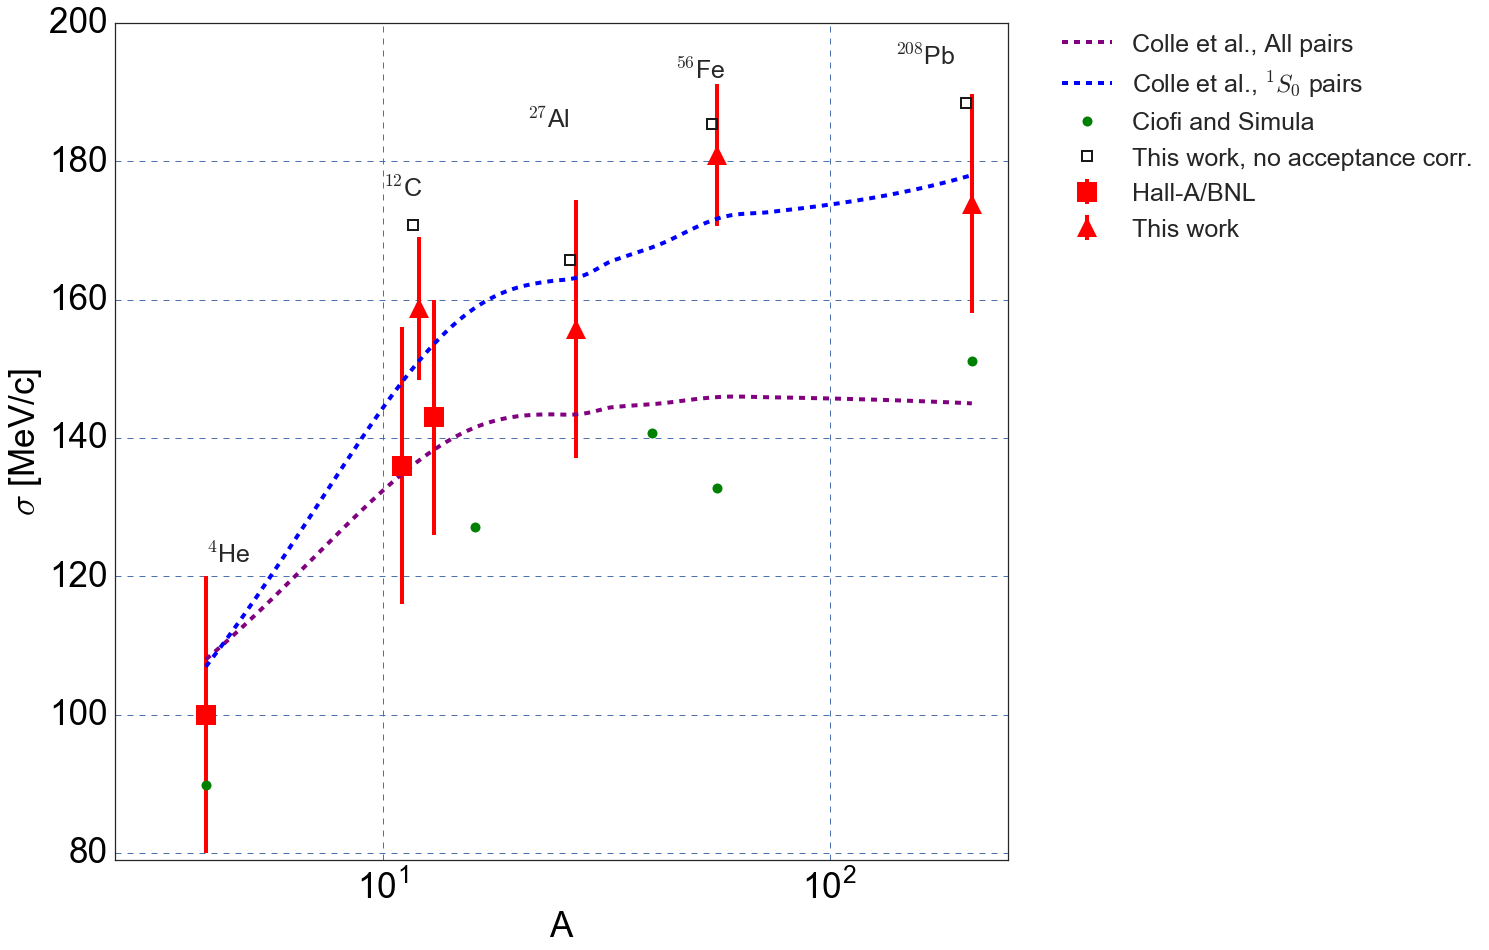

In [157]:
do_line_checks = False
s=30
fig, ax = plt.subplots(figsize=(16,15))
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='purple' ,label='Colle et al., All pairs')
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='nl00',label='Colle et al., $^1S_0$ pairs')
ax.plot(CiofiCalc.A, CiofiCalc.s_t,color='green',marker='o',ms=10,linewidth=0,label='Ciofi and Simula')

plot_data( data=BNL_Data, Ashift=1 , marker='s', label=None )
plot_data( data=HallA_Data, Ashift=-1 , marker='s' , label='Hall-A/BNL' )
plot_data( data=Korover_Data , marker='s' , label=None )

ax.plot(0.97*NoAccCorr['A'], NoAccCorr['s_t_final'], 
        color='red', marker='s',mfc='none',lw = 2, mew = 2, ms = 10, linewidth=0, label='This work, no acceptance corr.')


plot_data( data=ThisWork, label='This work' )


# plt.grid(which='both')
pt.set_axes(ax , 'A' , '$\sigma$ [MeV/c]' , fontsize=35)
ax.legend(fontsize=25,bbox_to_anchor=(1.05, 1), borderaxespad=0.,loc=2)
ax.grid(b=True, which='major', color='b', linestyle='--')

ax.set_xlim(2.5,250)
ax.set_ylim(79,200)
ax.set_xscale('log')
ax.text(4,122,'$^4$He',fontsize=25)
ax.text(10,175,'$^{12}$C',fontsize=25)
ax.text(21,185,'$^{27}$Al',fontsize=25)
ax.text(45,192,'$^{56}$Fe',fontsize=25)
ax.text(140,194,'$^{208}$Pb',fontsize=25)
if do_line_checks:
    do_line_check(12)
    do_line_check(27)
    do_line_check(56)
    do_line_check(208)

plt.savefig('/Users/erezcohen/Desktop/DataMining/AccCorr_ppSRCAnalysisNote/all_figures//WidthAdependence.pdf', dpi=300, bbox_inches='tight')


In [156]:
print ThisWork['s_t_final']-ThisWork['s_t_final_Err']
print ThisWork['s_t_final']+ThisWork['s_t_final_Err']

$^{12}$C      148.449449
$^{27}$Al     137.039362
$^{56}$Fe     170.602131
$^{208}$Pb    158.041998
dtype: float64
$^{12}$C      169.040709
$^{27}$Al     174.402446
$^{56}$Fe     191.193391
$^{208}$Pb    189.664775
dtype: float64
